<a href="https://colab.research.google.com/github/aaron-v19/practice/blob/main/Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Computer Vision


# **0. Computer vision libaries in PyTorch**
* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
 #Import Pytorch
import torch
from torch import nn
from torch.utils.data import DataLoader

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplot.lib for data visualisation
import matplotlib.pyplot as plt



#1. Getting a dataset

The dataset we are going to use is the MNIST dataset.

In [2]:
#Setup training  data

train_data=datasets.FashionMNIST(
    root="data",    #Where do you want to download data to?
    train=True,     #Do we want the training data set?
    download=True,  #Do we want to download yes/no?
    transform=ToTensor(),  #how do we want to transfer the data
    target_transform=None  #how do we want transform the labels
)

test_data=datasets.FashionMNIST(
    root="data",    #Where do you want to download data to?
    train=False,     #Do we want the training data set?
    download=True,  #Do we want to download yes/no?
    transform=ToTensor(),  #how do we want to transfer the data
    target_transform=None  #how do we want transform the labels
)

100%|██████████| 26421880/26421880 [00:02<00:00, 13208844.18it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 208028.21it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3844192.39it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17001792.91it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label=train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [5]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"Image Shape: {image.shape} -> [Color channels,heights,width]")
print(f"Image Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [Color channels,heights,width]
Image Label: Ankle boot


#1.2 Visualizing our data

 Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

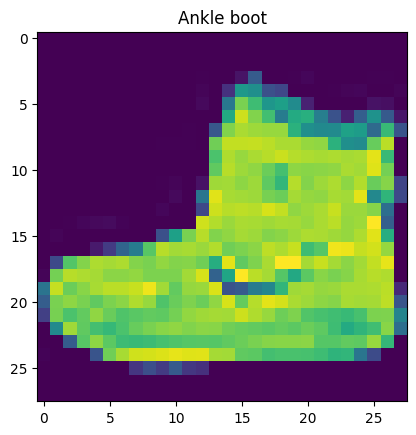

In [9]:
import matplotlib.pyplot as plt
image,label=train_data[0]
print(f" Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])


Text(0.5, 1.0, 'Ankle boot')

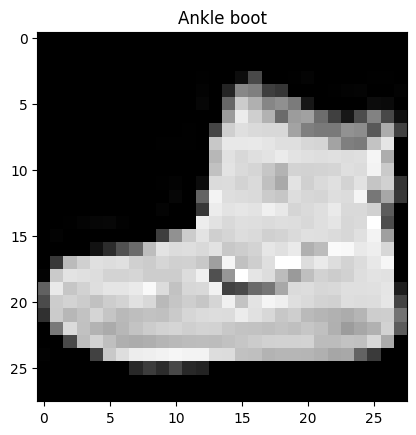

In [10]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])


In [11]:
torch.manual_seed(42)

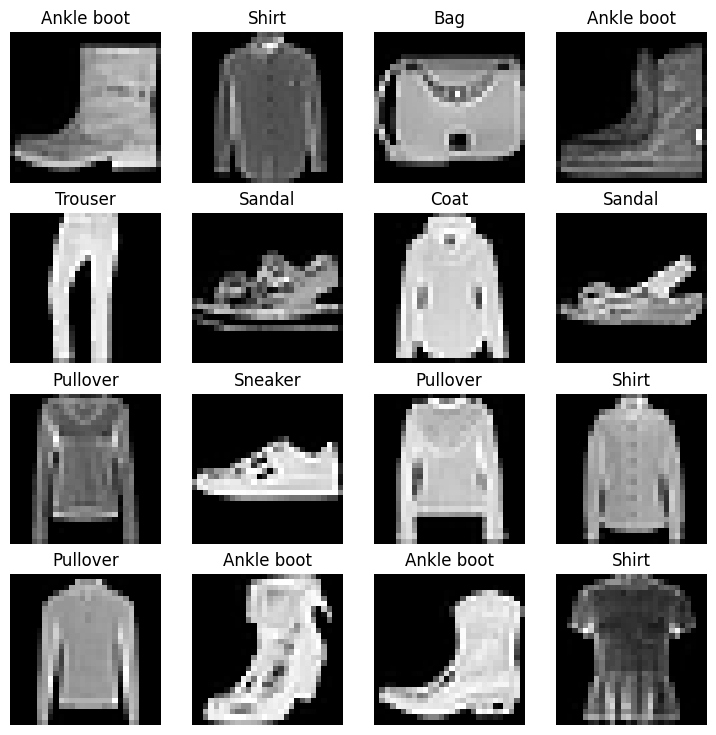

In [12]:
# Plot more images


fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  image,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

#2. Prepare Data Loader

Right now our data is in the form of a Pytorch dataset.

DataLoader turns our dataset into a Python iterable.

More specifically turn our data into mini batches

1. It is more computationally efficient as in, computer hardwarre may not be able to look at 60000 images in one hit
2. It gives our neural network more chances to update


In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x786abf0ebdf0>,
 <torch.utils.data.dataloader.DataLoader at 0x786abf488400>)

In [14]:
print(f"Dataloaders: {train_dataloader,test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x786abf0ebdf0>, <torch.utils.data.dataloader.DataLoader object at 0x786abf488400>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [15]:
#check out what is inside the training dataloader

train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
 Label: 8, label size: torch.Size([])


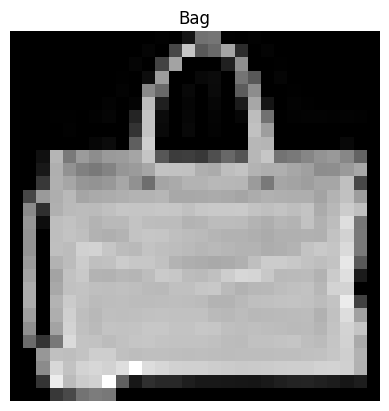

In [16]:
#torch.manual_seed(42)

random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()

img,label=train_features_batch[random_idx],train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f" Label: {label}, label size: {label.shape}")

## Model 0 : Build a baseline model

When starting to build a series of ml modelling experiments, its best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments



In [17]:
#Create a flatten layer

flatten_model=nn.Flatten()

x=train_features_batch[0]
print(f"Shape before flattening: {x.shape}")
output=flatten_model(x)
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)
model_0=FashionMNISTModelV0(
    input_shape=28*28,  # size of image
    hidden_units=10,    #how many units in hidden layer
    output_shape=len(class_names)   # one of every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

#3.1 Setup loss function ,optimizer  and evaluation metrics

* Loss function - since multiclass `nn.CrossEntropy()`
* Optimizer -`SGD()`



In [21]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [22]:
#import accuracy metric

from helper_functions import accuracy_fn

#setup loss and optimizer

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

#### 3.2 Create function to time experiments



In [23]:
from timeit import default_timer as timer


def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  total_time=end-start
  print(f"Train time on {device}:{total_time:.3f}  seconds")
  return total_time

In [24]:
atart_time=timer()
end_time=timer()
print_train_time(start=atart_time,
                 end=end_time,
                 device="cpu")

Train time on cpu:0.000  seconds


5.355700000109209e-05

### 3.3 Creating a training loop

1. Loop through epochs
2. Loop through training testing batches ,perform training steps ,  calculate test loss *per batch*
3. Loop through testing batches, perform ,testing steps, calculate the test loss *per bathc*
4. Printout what is happening
5. Time it all

In [49]:
#import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
start_timer=timer()

# set the number of epochs
epochs=3

#loop through epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  ###training
  train_loss=0

  #loop through batches
  #Add a loop through the training batches
  for batch, (X,y) in enumerate (train_dataloader):
    model_0.train()

    #1 Forward pass
    y_pred=model_0(X)

    #2. Calc loss per batch
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Back propogation Loss
    loss.backward()

    #5 Optimizer Step
    optimizer.step()

    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  #divide total train loss by length of train dataloader
  train_loss/=len(train_dataloader)

  ###testing loop
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. forward pass
      test_pred=model_0(X_test)

      #2. Calculate loss
      test_loss+=loss_fn(test_pred,y_test)

      #3. Calculate accuracy
      test_acc+=accuracy_fn(y_true=y_test,
                            y_pred=test_pred.argmax(dim=1))

    #Calculate the test loss average per batch
    test_loss/=len(test_dataloader)

    #Calculate the test accuracy average per batch
    test_acc/=len(test_dataloader)

  ##print out what is happening
  print(f"Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

end_timer=timer()
total_time=print_train_time(start=start_timer,
                            end=end_timer,
                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.59039 | Test Loss: 0.50954 | Test Acc: 82.04%
Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.47633 | Test Loss: 0.47989 | Test Acc: 83.20%
Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.45503 | Test Loss: 0.47664 | Test Acc: 83.43%
Train time on cpu:36.870  seconds


In [50]:
# Save the entire model
torch.save(model_0, '/content/drive/MyDrive/PracticeModels/Pytorch_Computer_Vision/model_0.pth')

#4. Make predictions and get Model_0 results

In [51]:
#import tqdm for progress bar
from tqdm.auto import tqdm


In [52]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #Make predictions
      y_pred=model(X)

      #Accumulate the loss and acc values per batch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))
    #Scale the loss and acc to find the average loss per batch
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}

#Calculate model_0 results to test dataset

model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

#5. Setup device agnostic code


In [53]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [25]:
import torch
torch.cuda.is_available()

False

In [26]:
#Setup evice agnostic code
import torch
device ="cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

#6.1 Modeling 1: Building a better model with non linearity

In [56]:
#Create a model with nonlinear and linear layes

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)

In [57]:
#Create model instance
torch.manual_seed(42)
model_1=FashionMNISTModelV1(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [27]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py already exists


In [28]:
#import accuracy metric

from helper_functions import accuracy_fn

#setup loss and optimizer

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

NameError: name 'model_1' is not defined

#6.2 Functionizing training and testing loop

Let's create a function for
* training loop -`train_step`
* testing loop -`test_step`
* model training -`train`

Training step Funtion

In [83]:
def train_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device
               ):
  """ Performs a training with model trying to learn on data_loader"""
  print(f"Epoch: {epoch}\n---------")
  ###training
  train_loss,train_acc=0,0

  #Put Model in training Mode
  model.train()

  #Add a loop through the training batches
  for batch, (X,y) in enumerate (data_loader):

    #Send data to target device
    X,y=X.to(device),y.to(device)

    #1 Forward pass
    y_pred=model(X)

    #2. Calc loss per batch
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Back propogation Loss
    loss.backward()

    #5 Optimizer Step
    optimizer.step()

  #divide total train loss and train acc by length of train dataloader
  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)
  print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")


Testing step function

In [84]:
def test_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device
               ):

    """ Performs a testing with model trying to learn on data_loader"""
    print(f"Epoch: {epoch}\n---------")
     ###testing loop
    test_loss,test_acc=0,0
    model.eval()

    with torch.inference_mode():
        for X,y in test_dataloader:
        #Send data to target device
            X,y=X.to(device),y.to(device)

            #1. forward pass
            test_pred=model(X)

            #2. Calculate loss
            test_loss+=loss_fn(test_pred,y)

            #3. Calculate accuracy
            test_acc+=accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))

        #Calculate the test loss average per batch
        test_loss/=len(test_dataloader)

        #Calculate the test accuracy average per batch
        test_acc/=len(test_dataloader)

        ##print out what is happening
        print(f" Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

In [85]:
torch.manual_seed(42)

#Measure Time
from timeit import default_timer as timer
train_time_start_on_gpu=timer()

#set epochs
epochs=3

#loop through epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu,
                                          device=str(next(model_1.parameters()).device))
#

NameError: name 'tqdm' is not defined

In [82]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            #Send data to target device
            X,y=X.to(device),y.to(device)
            #Make predictions
            y_pred=model(X)

            #Accumulate the loss and acc values per batch
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
        #Scale the loss and acc to find the average loss per batch
        loss/=len(data_loader)
        acc/=len(data_loader)
    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}


In [64]:
#get model_1 results

model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

## Model 2 : Building a Convolutional Neural Network(CNN)


In [88]:
#create a convnet

class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG
    from CNN explainer website
    """
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)

        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self,x):
        x=self.conv_block_1(x)
        #print(x.shape)
        x=self.conv_block_2(x)
        #print(x.shape)
        x=self.classifier(x)
        #print(x.shape)
        return x

In [73]:
rand_image_tensor=torch.randn(size=(1,28,28)).to(device)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [92]:
model_2.eval()
with torch.inference_mode():
    model_2(rand_image_tensor.unsqueeze(0))

In [93]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

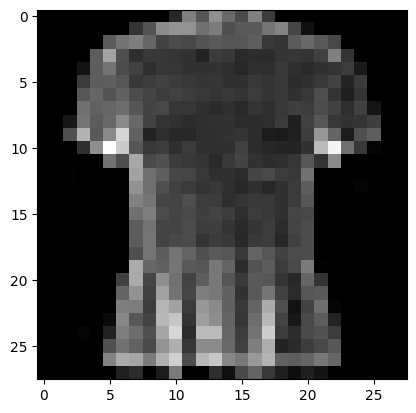

In [55]:
plt.imshow(image.squeeze(),cmap="gray")

# 7.1 Stepping through `nn.Conv2d()`

In [33]:
torch.manual_seed(42)
images=torch.randn(size=(32,3,64,64))
test_image=images[0]

print(f"Image batch shape: {images.shape}")
print(f"Shape of test image: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Shape of test image: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [52]:
#create a conv2d layer
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=(3,3),
                     stride=1,
                     padding=0)

#pass the data through the convolutional layer

conv_output=conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape

torch.Size([1, 10, 62, 62])

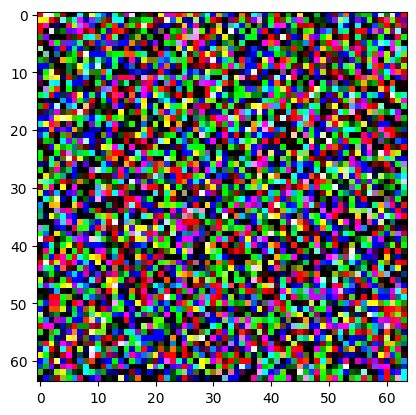

In [46]:
plt.imshow(test_image.permute(1, 2, 0))

## 7.2 Stepping through `nn.MaxPool2d()`

In [53]:
#Print out original image shape without unsqueezed dimension

print(f"Shape of Test image: {test_image.shape}")
print(f"Shape of Test image unsqueezed:\n {test_image.unsqueeze(0).shape}")

#create a simple maxpool2d layer

max_pool_layer=nn.MaxPool2d(kernel_size=2)

#Pass data through just conv layer

test_image_through_conv=conv_layer(test_image.unsqueeze(0))
print(f"Shape of test image through conv layer: {test_image_through_conv.shape}")

#Pass data through maxpool layer

test_image_output=max_pool_layer(test_image_through_conv)
print(f"Shape of test image through maxpool layer: {test_image_output.shape}")

Shape of Test image: torch.Size([3, 64, 64])
Shape of Test image unsqueezed:
 torch.Size([1, 3, 64, 64])
Shape of test image through conv layer: torch.Size([1, 10, 62, 62])
Shape of test image through maxpool layer: torch.Size([1, 10, 31, 31])


In [54]:
torch.manual_seed(42)
# Create a random tesnor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


###7.3 Setup a loss function and Optimizer

In [79]:


loss_fn=nn.CrossEntropyLoss()
Optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

###7.4 Training and testing model_s using our training and test functions


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
#from tqdm.auto import tqdm
train_time_start_model_2=timer()

#train and test model
epochs=3
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=Optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device=str(next(model_2.parameters()).device))

Epoch: 0
---------
Epoch: 0
---------
Train Loss: 2.30229 | Train Acc: 10.00%
Epoch: 0
---------
 Test Loss: 2.30231 | Test Acc: 9.99%
Epoch: 1
---------
Epoch: 1
---------
Train Loss: 2.30228 | Train Acc: 10.00%
Epoch: 1
---------
 Test Loss: 2.30231 | Test Acc: 9.99%
Epoch: 2
---------
Epoch: 2
---------
